In [ ]:
## 1. 유튜브 댓글 크롤링

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from openpyxl import Workbook

## 크롬창에서 입력한 url로 이동하여 댓글을 추출 하는 함수
# 순서: 크롬창 띄우기 -> url로 이동 -> 해당 url의 하단으로 스크롤(유튜브 댓글이 해당 페이지의 하단에 있기 때문)
#      -> 댓글 요소 탐색 -> 추출 -> 아래로 스크롤 -> 추가로 로드 된 댓글 확인 -- 이 4가지 작업 반복
#      -> 스크롤을 해도 추가 로드 된 댓글이 없으면 stop
def crawl_youtube_comments(url):

    # Chrome 웹 드라이버 실행
    driver = webdriver.Chrome()
    # 유튜브 댓글 페이지 열기
    driver.get(url)
    # 페이지가 로드될 때까지 잠시 대기
    time.sleep(6)

    # 스크롤을 내려 더 많은 댓글을 로드
    body = driver.find_element(By.TAG_NAME, 'body')
    while True:
        # 현재 댓글 수
        current_comments = len(driver.find_elements(By.CSS_SELECTOR, "#content-text"))
        # 페이지 스크롤 다운
        body.send_keys(Keys.END)
        time.sleep(4)  # 스크롤 후 페이지가 로드될 때까지 대기
        # 새로 로드된 댓글 수
        new_comments = len(driver.find_elements(By.CSS_SELECTOR, "#content-text"))
        # 댓글이 더 이상 로드되지 않으면 종료
        if new_comments == current_comments:
            break
        print(f"댓글 수: {new_comments}")
    # 댓글 요소들 찾기
    comment_elements = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    comments = []
    # 댓글 텍스트 추출
    for comment in comment_elements:
        comments.append(comment.text)
        # 답글 찾기
        parent_element = comment.find_element(By.XPATH, "..")
        replies = parent_element.find_elements(By.XPATH, ".//yt-formatted-string[@id='content-text']")
        for reply in replies:
            comments.append("답글: " + reply.text)
    # 크롬 드라이버 종료
    driver.quit()
    return comments



## 추출한 댓글 저장(excel) 함수
def save_to_excel(comments, filename):
    # 엑셀 워크북 생성
    wb = Workbook()
    ws = wb.active
    ws.append(["댓글"])
    # 댓글을 엑셀에 쓰기
    for i, comment in enumerate(comments, start=1):
        ws.append([comment])
        print(f"\r댓글 저장 중... ({i}/{len(comments)})", end="")
    # 엑셀 파일 저장
    wb.save(filename)
    print("\n댓글이 성공적으로 저장되었습니다.")


## 탐색할 url의 주소와 저장 파일명 입력 및 함수 실행
if __name__ == "__main__":
    # 유튜브 동영상 URL
    youtube_url = input("url 입력하세요.")
    file_name = input('저장할 파일명을 입력하세요: ')+'.xlsx'

    # 크롤링할 댓글
    comments = crawl_youtube_comments(youtube_url)
    # 엑셀 파일로 저장
    save_to_excel(comments, file_name)

In [2]:
# matplotlib에서 나눔 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'
font_name = mpl.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
## 2. 크롤링 파일 불러 오기 및 전처리
# 결측치, 중복 데이터 제거
# 문장 split

import pandas as pd
from transformers import pipeline


# 데이터 불러오기
file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/gal_s24_com_1-50.xlsx"
s24 = pd.read_excel(file_path)
print(f'유튜브 댓글의 전체 갯수: {len(s24)}')


# 결측치 및 중복 데이터 제거
s24.dropna(inplace=True)
s24.drop_duplicates(inplace=True)
print(f'결측치 및 중복 데이터 제거 후 데이터의 길이: {len(s24)}')


# \n으로 구분된 댓글을 각각의 행으로 분할
s24['댓글'] = s24['댓글'].str.split('\n')
s24 = s24.explode('댓글').reset_index(drop=True)


# 마침표로 구분된 문장을 각각의 행으로 분할, 마침표만 남게 되는 행은 삭제
s24['댓글'] = s24['댓글'].str.split('.')
s24 = s24.explode('댓글').reset_index(drop=True)
s24['댓글'] = s24['댓글'].str.strip()
s24 = s24[s24['댓글'] != ''].reset_index(drop=True)


# 결과 출력
display(s24)

'''
# 결과를 엑셀 파일로 저장
output_file_path = "C:/Users/Hong/snsmarketing/data/s24.xlsx"
s24.to_excel(output_file_path, index=False)
print("Excel 파일이 성공적으로 저장되었습니다:", output_file_path)
'''

유튜브 댓글의 전체 갯수: 13782
결측치 및 중복 데이터 제거 후 데이터의 길이: 13484


,댓글
0,아무리 기본 S모델이라지만 가격이 절대 저렴하지 않은데 램8기가 넣은 건 진짜 실망...
1,그래도 여러가지 항목으로 나눠서 정리해 주니까 한눈에 보기 편하네요
2,요런 리뷰 좋습니다
3,비교분석 감사드립니다
4,항상 잘보고 있어요!
...,...
24636,와 삼성이 이렇게 진심으로 삼성을 좋아하는 사람한테 대하는 태도가 참
24637,쓴소리 몇마디했다고 차별하는게 마치 중국스럽네요
24638,한마디로 꼴불견이네요
24639,정떨어져서 담에는 애플로 넘어가야겠어요 ㅎㅎ


'\n# 결과를 엑셀 파일로 저장\noutput_file_path = "C:/Users/Hong/snsmarketing/data/s24.xlsx"\ns24.to_excel(output_file_path, index=False)\nprint("Excel 파일이 성공적으로 저장되었습니다:", output_file_path)\n'

In [ ]:
## 3. 감성 분석 실행 및 저장
# 감성 분석을 위해 파이프라인 모델 로드
model_name = 'snunlp/KR-FinBert-SC'
kor_finbert = pipeline(model=model_name)

# 텍스트 데이터 생성
text = s24['댓글'].tolist()

# 감성 분석 실행
result = kor_finbert(text)

# 감성 분석 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result)

# 원본 데이터와 감성 분석 결과를 합침
s24['label'] = result_df['label']
s24['score'] = result_df['score']

display(s24)

'''
# 감성 분석 결과를 엑셀 파일로 저장
output_file_path = "C:/Users/Hong/snsmarketing/data/s24_finbert.xlsx"
s24.to_excel(output_file_path, index=False)
print("감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path)
'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

각 라벨의 빈도수:
label
neutral     22571
negative     1045
positive     1025
Name: count, dtype: int64


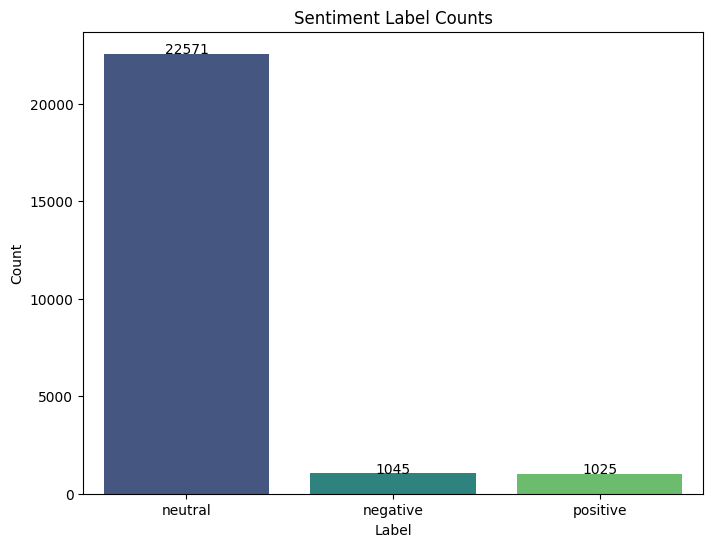

In [ ]:
## 4. 감성 분석 결과 시각화(label 빈도수 비교)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 엑셀 파일로부터 데이터프레임으로 불러오기
file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_finbert.xlsx"
s24 = pd.read_excel(file_path)

# 각 라벨의 빈도수를 계산
label_counts = s24['label'].value_counts()

# 빈도수 출력
print("각 라벨의 빈도수:")
print(label_counts)

# 빈도수를 데이터프레임으로 변환
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['label', 'count']

# 시각화 설정 (전체 라벨)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='label', y='count', hue='label', data=label_counts_df, palette='viridis', dodge=False, legend=False)

# 막대 그래프 위에 빈도수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# 제목 및 라벨 설정
plt.title('Sentiment Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')

# 그래프 출력
plt.show()

In [ ]:
## 5. 감성분석을 마친 데이터에서 레이블이 neutral인 데이터 삭제

file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_finbert.xlsx"
s24 = pd.read_excel(file_path)
display(s24)
print(type(s24))

print("데이터프레임 구조:")
print(s24.info())

s24 = s24[s24['label'] != 'neutral']
s24.sort_values(by='label', inplace=True)
s24.reset_index(drop=True, inplace=True)
display(s24)

output_file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_finbert_noneu.xlsx"
s24.to_excel(output_file_path, index=False)
print("감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path)

,댓글,label,score
0,아무리 기본 S모델이라지만 가격이 절대 저렴하지 않은데 램8기가 넣은 건 진짜 실망...,neutral,0.876683
1,그래도 여러가지 항목으로 나눠서 정리해 주니까 한눈에 보기 편하네요,neutral,0.999121
2,요런 리뷰 좋습니다,neutral,0.999890
3,비교분석 감사드립니다,neutral,0.819777
4,항상 잘보고 있어요!,neutral,0.998734
...,...,...,...
24636,와 삼성이 이렇게 진심으로 삼성을 좋아하는 사람한테 대하는 태도가 참,neutral,0.942464
24637,쓴소리 몇마디했다고 차별하는게 마치 중국스럽네요,neutral,0.814042
24638,한마디로 꼴불견이네요,neutral,0.781010
24639,정떨어져서 담에는 애플로 넘어가야겠어요 ㅎㅎ,neutral,0.943827


<class 'pandas.core.frame.DataFrame'>
데이터프레임 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단어      3 non-null      object
 1   빈도수     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None


,댓글,label,score
0,이게 저화질 플리커 현상 때문이었구나,negative,0.893545
1,역시 폴드4는 제외 군요 또륵,negative,0.595987
2,S22 쓰는데 진심 이때까지 썼던 폰들 중에 최악이에요,negative,0.976142
3,노트9은 버린 자식인가요?,negative,0.806122
4,"요즘은 노트북도 기본 5년은 쓰는데, 노트북 보다 비싼 폰을 2년짜리 취급을 하니 ...",negative,0.457106
...,...,...,...
2065,이제는 점유율마저 아이폰에 내줬다고 하던데 다시 탈환해 올 수 있을까,positive,0.506111
2066,아이폰이나 갤럭시나 하드웨어 완성도는 진짜 극에 달했네요,positive,0.492461
2067,그에 비해 울트라는 다른 스마트폰과 확실한 차별성으로부터 비롯된 유니크함과 소재의 ...,positive,0.996128
2068,갠적으로 화면은 노트10 6,positive,0.985767


감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다: C:/Users/Hong/snsmarketing/data/s24_finbert_noneu.xlsx


In [ ]:
## 6. 형태소 분석(Kkma)

import pandas as pd
from konlpy.tag import Kkma
from tqdm import tqdm

# 파일 경로 설정
file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_finbert_noneu.xlsx"

# 데이터 불러오기
s24 = pd.read_excel(file_path)

# Kkma 객체 생성
kkma = Kkma()

# 형태소 분석 함수 정의
def analyze_comment(comment):
    return kkma.morphs(comment)

# tqdm을 사용하여 진행률 표시
tqdm.pandas()

# 각 행에 대해 형태소 분석 적용하여 '댓글_형태소' 열에 추가
s24['댓글_형태소'] = s24['댓글'].progress_apply(lambda x: analyze_comment(x) if pd.notnull(x) else [])

# 결과 출력
display(s24)

'''
# 결과를 엑셀 파일로 저장
output_file_path = "C:/Users/Hong/snsmarketing/data/s24_Kkma.xlsx"
s24.to_excel(output_file_path, index=False)
print("감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path)
'''

100%|██████████████████████████████████████████████████████████████████████████████| 2070/2070 [01:22<00:00, 25.05it/s]


,댓글,label,score,댓글_형태소
0,이게 저화질 플리커 현상 때문이었구나,negative,0.893545,"[이것, 이, 저, 어, 화질, 플리커, 현상, 때문, 이, 었, 구나]"
1,역시 폴드4는 제외 군요 또륵,negative,0.595987,"[역시, 폴드, 4, 는, 제외, 군, 요, 또, 륵]"
2,S22 쓰는데 진심 이때까지 썼던 폰들 중에 최악이에요,negative,0.976142,"[S, 22, 쓰, 는데, 진심, 이때, 까지, 쓰, 었, 더, ㄴ, 폰, 들, 중..."
3,노트9은 버린 자식인가요?,negative,0.806122,"[노트, 9, 은, 버리, ㄴ, 자식, 이, ㄴ가요, ?]"
4,"요즘은 노트북도 기본 5년은 쓰는데, 노트북 보다 비싼 폰을 2년짜리 취급을 하니 ...",negative,0.457106,"[요즘, 은, 노트북, 도, 기본, 5, 년, 은, 쓰, 는데, ,, 노트북, 보다..."
...,...,...,...,...
2065,이제는 점유율마저 아이폰에 내줬다고 하던데 다시 탈환해 올 수 있을까,positive,0.506111,"[이제, 는, 점유율, 마저, 아이, 폰, 에, 내주, 었, 다고, 하, 던데, 다..."
2066,아이폰이나 갤럭시나 하드웨어 완성도는 진짜 극에 달했네요,positive,0.492461,"[아이, 폰, 이나, 갤럭시, 나, 하드웨어, 완성도, 는, 진짜, 극, 에, 달하..."
2067,그에 비해 울트라는 다른 스마트폰과 확실한 차별성으로부터 비롯된 유니크함과 소재의 ...,positive,0.996128,"[그, 에, 비하, 어, 울트라, 는, 다른, 스마트, 폰, 과, 확실, 하, ㄴ,..."
2068,갠적으로 화면은 노트10 6,positive,0.985767,"[개, ㄴ, 적, 으로, 화면, 은, 노트, 10, 6]"


감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다: C:/Users/Hong/snsmarketing/data/s24_Kkma2.xlsx


In [ ]:
## 7. 불용어 제거

import string
import pandas as pd
import ast

# 엑셀 파일로부터 데이터프레임으로 불러오기
s24 = pd.read_excel("/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_Kkma.xlsx")

# '댓글_형태소' 열의 각 행을 리스트로 인식하여 데이터프레임으로 변환
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        print(f"Error parsing: {val}")
        return []

s24['댓글_형태소'] = s24['댓글_형태소'].apply(safe_literal_eval)

# 불용어 사전 텍스트 파일 불러오기
stopwords_kor_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/stopwords.txt"
stopwords_s24_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/stopwords_s24.txt"

with open(stopwords_kor_path, 'r', encoding='utf-8') as file:
    stopwords_kor = file.read().splitlines()

with open(stopwords_s24_path, 'r', encoding='utf-8') as file:
    stopwords_s24 = file.read().splitlines()

word_list = stopwords_kor + stopwords_s24
word_list.extend(list(string.punctuation))

# '댓글_형태소_불용어제거' 열 초기화 및 불용어 처리
def remove_stopwords(tokens, stopwords):
    return [word for word in tokens if word not in stopwords]

s24['댓글_형태소_불용어제거'] = s24['댓글_형태소'].apply(lambda x: remove_stopwords(x, word_list))

# 결과 확인
display(s24['댓글_형태소_불용어제거'])

# 결과를 엑셀 파일로 저장 (필요한 경우)
output_file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_Kkma_clean.xlsx"
s24.to_excel(output_file_path, index=False)
print("감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path)

0                                   [화질, 플리커, 현상, 때문, 구나]
1                                         [역시, 폴드, 제외, 륵]
2                                            [22, 진심, 최악]
3                                         [노트, 9, 버리, 자식]
4       [요즘, 노트북, 기본, 5, 노트북, 보다, 비싸, 2, 짜리, 취급, 답, 라는...
                              ...                        
2065                                    [점유율, 내주, 탈환, 을까]
2066                               [하드웨어, 완성도, 진짜, 극, 달하]
2067    [비하, 울트라, 스마트, 확실, 차별성, 유니크함, 소재, 고급, 스럽, 섞이, ...
2068                                      [화면, 노트, 10, 6]
2069    [듣, 인공지능, 비서, 빅, 스비, SK, 에이, 닷, 연동, 편리, 음성, 명령...
Name: 댓글_형태소_불용어제거, Length: 2070, dtype: object

감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다: C:/Users/Hong/snsmarketing/data/s24_Kkma_clean.xlsx


In [ ]:
## 8. label 정수형 치환(생략 가능)

import pandas as pd
import ast

# 파일 경로 설정
file_path = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/s24_Kkma_clean.xlsx"

# 데이터 불러오기
s24 = pd.read_excel(file_path)

# '댓글_형태소' 및 '댓글_형태소_불용어제거' 열의 문자열을 실제 리스트로 변환
s24['댓글_형태소'] = s24['댓글_형태소'].apply(ast.literal_eval)
s24['댓글_형태소_불용어제거'] = s24['댓글_형태소_불용어제거'].apply(ast.literal_eval)

# 'label' 열의 데이터를 정수형으로 치환
s24['label'] = s24['label'].map({'negative': -1, 'positive': 1}).astype(int)

# 데이터 확인
display(s24)
print(s24.dtypes)

,댓글,label,score,댓글_형태소,댓글_형태소_불용어제거
0,이게 저화질 플리커 현상 때문이었구나,-1,0.893545,"[이것, 이, 저, 어, 화질, 플리커, 현상, 때문, 이, 었, 구나]","[화질, 플리커, 현상, 때문, 구나]"
1,역시 폴드4는 제외 군요 또륵,-1,0.595987,"[역시, 폴드, 4, 는, 제외, 군, 요, 또, 륵]","[역시, 폴드, 제외, 륵]"
2,S22 쓰는데 진심 이때까지 썼던 폰들 중에 최악이에요,-1,0.976142,"[S, 22, 쓰, 는데, 진심, 이때, 까지, 쓰, 었, 더, ㄴ, 폰, 들, 중...","[22, 진심, 최악]"
3,노트9은 버린 자식인가요?,-1,0.806122,"[노트, 9, 은, 버리, ㄴ, 자식, 이, ㄴ가요, ?]","[노트, 9, 버리, 자식]"
4,"요즘은 노트북도 기본 5년은 쓰는데, 노트북 보다 비싼 폰을 2년짜리 취급을 하니 ...",-1,0.457106,"[요즘, 은, 노트북, 도, 기본, 5, 년, 은, 쓰, 는데, ,, 노트북, 보다...","[요즘, 노트북, 기본, 5, 노트북, 보다, 비싸, 2, 짜리, 취급, 답, 라는..."
...,...,...,...,...,...
2065,이제는 점유율마저 아이폰에 내줬다고 하던데 다시 탈환해 올 수 있을까,1,0.506111,"[이제, 는, 점유율, 마저, 아이, 폰, 에, 내주, 었, 다고, 하, 던데, 다...","[점유율, 내주, 탈환, 을까]"
2066,아이폰이나 갤럭시나 하드웨어 완성도는 진짜 극에 달했네요,1,0.492461,"[아이, 폰, 이나, 갤럭시, 나, 하드웨어, 완성도, 는, 진짜, 극, 에, 달하...","[하드웨어, 완성도, 진짜, 극, 달하]"
2067,그에 비해 울트라는 다른 스마트폰과 확실한 차별성으로부터 비롯된 유니크함과 소재의 ...,1,0.996128,"[그, 에, 비하, 어, 울트라, 는, 다른, 스마트, 폰, 과, 확실, 하, ㄴ,...","[비하, 울트라, 스마트, 확실, 차별성, 유니크함, 소재, 고급, 스럽, 섞이, ..."
2068,갠적으로 화면은 노트10 6,1,0.985767,"[개, ㄴ, 적, 으로, 화면, 은, 노트, 10, 6]","[화면, 노트, 10, 6]"


댓글               object
label             int32
score           float64
댓글_형태소           object
댓글_형태소_불용어제거     object
dtype: object


In [ ]:
## 9. positive - negative 데이터 분리 작업
s24_positive = s24[s24['label'] == 1].reset_index(drop=True)
s24_negative = s24[s24['label'] == -1].reset_index(drop=True)

print("Positive DataFrame:")
display(s24_positive)
print("\nNegative DataFrame:")
display(s24_negative)

Positive DataFrame:


,댓글,label,score,댓글_형태소,댓글_형태소_불용어제거
0,대박ㅎ,1,0.847126,"[대박, ㅎ]","[대박, ㅎ]"
1,현재 국내에 판매되고 있는 삼성 모바일의 경우 '보상판매'의 기간제를 두고 있지만 ...,1,0.394191,"[현재, 국내, 에, 판매, 되, 고, 있, 는, 삼성, 모바일, 의, 경우, ',...","[현재, 국내, 판매, 모바일, 경우, 보상, 판매, 기간, 두, 미국, 법인, 경..."
2,갤 편의성,1,0.705969,"[개, ㄹ, 편의성]",[편의성]
3,현기차도 차별하더만 삼성전자도 차별하네,1,0.883947,"[현기, 차도, 차별하더, 만, 삼성전자, 도, 차별, 하, 네]","[현기, 차도, 차별하더, 삼성전자, 차별]"
4,컴퓨터기초 및 스마트폰 사용법 IT 기기 엑셀 프리젠테이션 한글 문서작성,1,0.620704,"[컴퓨터, 기초, 및, 스마트, 폰, 사용법, IT, 기기, 엑셀, 프리젠테이션, ...","[컴퓨터, 기초, 스마트, 사용법, IT, 기기, 엑셀, 프리젠테이션, 한글, 문서..."
...,...,...,...,...,...
1020,이제는 점유율마저 아이폰에 내줬다고 하던데 다시 탈환해 올 수 있을까,1,0.506111,"[이제, 는, 점유율, 마저, 아이, 폰, 에, 내주, 었, 다고, 하, 던데, 다...","[점유율, 내주, 탈환, 을까]"
1021,아이폰이나 갤럭시나 하드웨어 완성도는 진짜 극에 달했네요,1,0.492461,"[아이, 폰, 이나, 갤럭시, 나, 하드웨어, 완성도, 는, 진짜, 극, 에, 달하...","[하드웨어, 완성도, 진짜, 극, 달하]"
1022,그에 비해 울트라는 다른 스마트폰과 확실한 차별성으로부터 비롯된 유니크함과 소재의 ...,1,0.996128,"[그, 에, 비하, 어, 울트라, 는, 다른, 스마트, 폰, 과, 확실, 하, ㄴ,...","[비하, 울트라, 스마트, 확실, 차별성, 유니크함, 소재, 고급, 스럽, 섞이, ..."
1023,갠적으로 화면은 노트10 6,1,0.985767,"[개, ㄴ, 적, 으로, 화면, 은, 노트, 10, 6]","[화면, 노트, 10, 6]"



Negative DataFrame:


,댓글,label,score,댓글_형태소,댓글_형태소_불용어제거
0,이게 저화질 플리커 현상 때문이었구나,-1,0.893545,"[이것, 이, 저, 어, 화질, 플리커, 현상, 때문, 이, 었, 구나]","[화질, 플리커, 현상, 때문, 구나]"
1,역시 폴드4는 제외 군요 또륵,-1,0.595987,"[역시, 폴드, 4, 는, 제외, 군, 요, 또, 륵]","[역시, 폴드, 제외, 륵]"
2,S22 쓰는데 진심 이때까지 썼던 폰들 중에 최악이에요,-1,0.976142,"[S, 22, 쓰, 는데, 진심, 이때, 까지, 쓰, 었, 더, ㄴ, 폰, 들, 중...","[22, 진심, 최악]"
3,노트9은 버린 자식인가요?,-1,0.806122,"[노트, 9, 은, 버리, ㄴ, 자식, 이, ㄴ가요, ?]","[노트, 9, 버리, 자식]"
4,"요즘은 노트북도 기본 5년은 쓰는데, 노트북 보다 비싼 폰을 2년짜리 취급을 하니 ...",-1,0.457106,"[요즘, 은, 노트북, 도, 기본, 5, 년, 은, 쓰, 는데, ,, 노트북, 보다...","[요즘, 노트북, 기본, 5, 노트북, 보다, 비싸, 2, 짜리, 취급, 답, 라는..."
...,...,...,...,...,...
1040,노트 20 울트라부터 손목이 단련이 되었는지 크게 불만은 없고,-1,0.908158,"[노트, 20, 울트라, 부터, 손목, 이, 단련, 이, 되, 었, 는지, 크, 게...","[노트, 20, 울트라, 손목, 단련, 는지, 크, 불만, 없]"
1041,"아니, 예상된 판매량을 기대할 수 있다면 어느정도의 문제는 그냥 무시하고 출시부터한...",-1,0.433647,"[알, 니, ,, 예상, 되, ㄴ, 판매량, 을, 기대, 하, ㄹ, 수, 있, 다면...","[알, 예상, 판매량, 기대, 다면, 정도, 문제, 그냥, 무시, ㄴ다는, 마인드,..."
1042,4:45 폰도 12기가램인데 M3맥북프로는 왜 8기가냐고ㅋㅋㅋㅋㅋㅋ,-1,0.616516,"[4, :, 45, 폰, 도, 12, 기가, 램, 이, ㄴ데, M, 3, 맥, 북,...","[45, 12, 기가, 램, M, 3, 맥, 북, 프로, 8, 기가, 냐, ㅋㅋㅋㅋㅋㅋ]"
1043,"울트라 잘못은 전혀아니지만, 네임드 게임 몇개 팅깁니다",-1,0.983595,"[울트라, 잘못, 은, 전혀, 아니, 지만, ,, 네, 임드, 게임, 몇, 개, 팅...","[울트라, 잘못, 전혀, 임드, 게임, 팅, 길]"


In [ ]:
## 10. 각 행의 데이터 타입 확인(데이터 검증 단계, 생략 가능)
def check_data_type(row):
    return isinstance(row, list)

# 각 행이 리스트인지 확인
s24_positive['is_list'] = s24_positive['댓글_형태소_불용어제거'].apply(check_data_type)

# 리스트가 아닌 데이터가 있는지 확인
if not s24_positive['is_list'].all():
    print("Some rows are not lists")
    # 리스트가 아닌 행을 출력
    non_list_rows = s24_positive[~s24_positive['is_list']]
    print(non_list_rows[['댓글_형태소_불용어제거']])
else:
    print("All rows are lists")

# 각 행에서 형태소를 출력
for index, row in s24_positive.iterrows():
    if isinstance(row['댓글_형태소_불용어제거'], list):
        for morph in row['댓글_형태소_불용어제거']:
            print(morph)
    else:
        print(f"Row {index} is not a list: {row['댓글_형태소_불용어제거']}")

All rows are lists
대박
ㅎ
현재
국내
판매
모바일
경우
보상
판매
기간
두
미국
법인
경우
기간제는
커녕
정부
군인
소방
의료인
선생님
별도
할인
행사
추가
넣
더군요
편의성
현기
차도
차별하더
삼성전자
차별
컴퓨터
기초
스마트
사용법
IT
기기
엑셀
프리젠테이션
한글
문서
작성
애플
처럼
칩
성능
우월
모르
ㄹ까
객관적
울트라
23
낫
번역
기능
대박
후
최소
2
달
지켜보
어쩌
없
지금
드로
이드
진영
그나마
견인
갈
라인업
아무리
픽
세
ai
뭐
인지도
판매
드로
이드
까
펜
제거
버전
미치
티타늄
그레이
엣
디스플레이
좋
울트라
다가
디자인
걸리
처음
플러스
내려오
플러스
디자인
울트라
내주
순
없
차별
말
ㄹ라고
그러
마다
한두
푼
플래그
쉬
울트라는
160
시작
QC
신경
신
제품
마다
문제점
상당히
테크몽
한테
무상
공해
!!!
카메라
디스플레이
울트라
플
립
ai
올
인하
어야
듯
울트라
성능
좋
디자인
플러스
이쁘
ㅜㅜ
아쉽
셀
레
나이트
그라파이트
그레이
화이
팅
플러스
사용
기대
무게
폴
드
급
디자인
성능
UHD
화면
주사
율
만족
스럽
뭔
배터리
빨리
닳
느낌
칩셋
엑시노스
스냅
드래곤
7
세대
낫
플러스
울트라
노트
펜
2
억
화소
가볍
성능
좋
지금껏
울트라
다가
무겁
플러스
갈아타
샹
해외
랑
다르
추
시하
이유
뭐
덩달
울트라
무겁
플러스
넘어오
아직
엘
윙
가로
본능
유용
잘
슬슬
버벅
시작
라고요
신소재
개발
무게
어떻
완벽
터
국내
경우
21
노트
20
시작
해외
경우
a
시리즈
시작
며
시리즈
경우
7
엣
보상
판매
a
등에
포함
않
휴대폰
보상
판매
올리
두
더군요
대신
내구성
뛰
남
최적화
자체
OS
달리
글
드로
이드
조해
서
특성
상
ram
용량
크
가져가
용량
늘리
ㅉㅉㅉ
디자인
플러스
승
플러스
무게
울트라
성능
미국
판
사면
플러스
모델
스냅
드래곤
넣
줌
내수
차별
오지
ㄴ다
노트
아이덴티티
울트라
디자인
좋
아라
말로
혁신
애플
보다
30
앞서
인정
플러스
2
억
화소
시작
내수
차별
강점


In [ ]:
## 11. positive - negative 각 데이터 별 형태소 빈도수 계산

import pandas as pd
from collections import Counter

# '댓글_형태소_불용어제거' 열에서 형태소 리스트 추출 및 빈도수 계산
def calculate_morph_frequencies(df):
    # 리스트 형식인지 확인
    def check_data_type(row):
        return isinstance(row, list)

    df['is_list'] = df['댓글_형태소_불용어제거'].apply(check_data_type)

    if not df['is_list'].all():
        print("Some rows are not lists")
        # 리스트가 아닌 행을 빈 리스트로 변환
        df['댓글_형태소_불용어제거'] = df['댓글_형태소_불용어제거'].apply(lambda x: x if isinstance(x, list) else [])

    # 리스트의 리스트를 평탄화하고 형태소 빈도수 계산
    morphs_flat = [item for sublist in df['댓글_형태소_불용어제거'] for item in sublist]
    morphs_counter = Counter(morphs_flat)

    # 결과를 데이터프레임으로 변환 및 정렬
    mor_freq = pd.DataFrame(morphs_counter.items(), columns=['형태소', '빈도수']).sort_values(by='빈도수', ascending=False)
    return mor_freq

# 형태소 빈도수 계산
mor_freq_positive = calculate_morph_frequencies(s24_positive)
mor_freq_negative = calculate_morph_frequencies(s24_negative)

# 결과 출력
display(positive_mor_freq)
display(negative_mor_freq)

# 결과를 엑셀 파일로 저장
output_file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq.to_excel(output_file_path, index=False)
output_file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq.to_excel(output_file_path, index=False)
print("형태소 빈도수가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path)

,형태소,빈도수,Sentiment
50,울트라,131,Positive
90,플러스,93,Positive
375,AI,90,Positive
133,기대,87,Positive
287,폴드,71,Positive
...,...,...,...
1201,욕,1,Positive
1198,소통,1,Positive
1197,채팅,1,Positive
1195,아티스트,1,Positive


,형태소,빈도수,Sentiment
74,울트라,121,Negative
6,폴드,65,Negative
12,노트,63,Negative
58,없,58,Negative
298,문제,55,Negative
...,...,...,...
1301,왜곡,1,Negative
1300,앱등이들,1,Negative
1299,계기,1,Negative
1297,ㅜㅜㅜ,1,Negative


형태소 빈도수가 포함된 Excel 파일이 성공적으로 저장되었습니다: C:/Users/Hong/snsmarketing/data/mor_freq_negative.xlsx


In [ ]:
# 맑은 고딕 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# fc-list 명령어를 사용하여 설치된 폰트 확인
!fc-list :lang=ko

import matplotlib.pyplot as plt
import matplotlib as mpl

# 맑은 고딕 폰트 설정
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 경로 확인
import matplotlib.font_manager as fm
print([f.fname for f in fm.fontManager.ttflist if 'Malgun' in f.name])

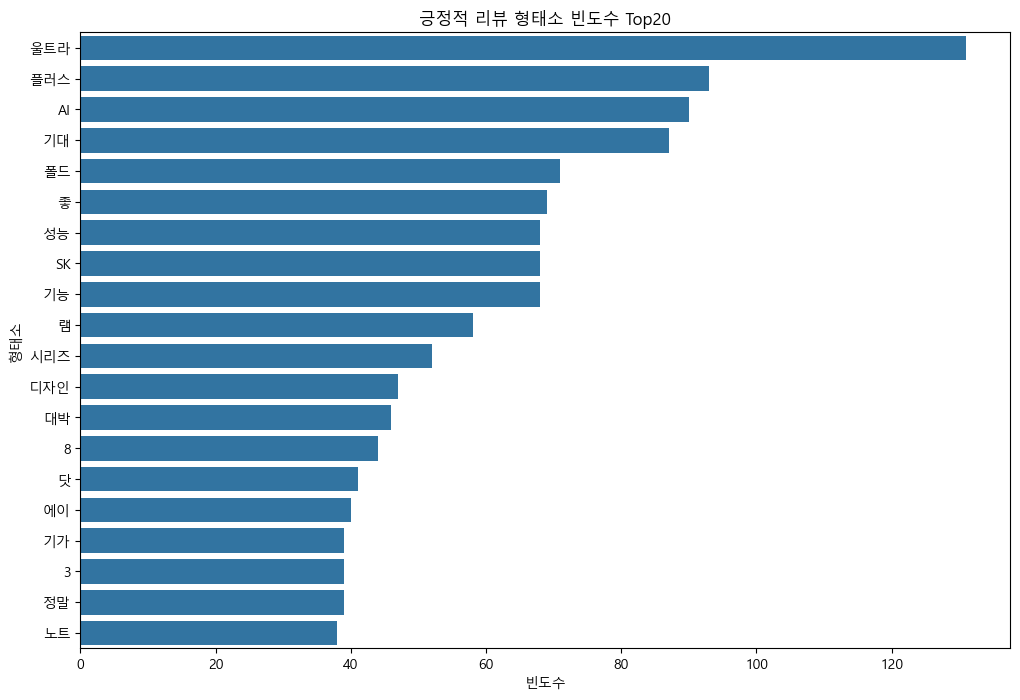

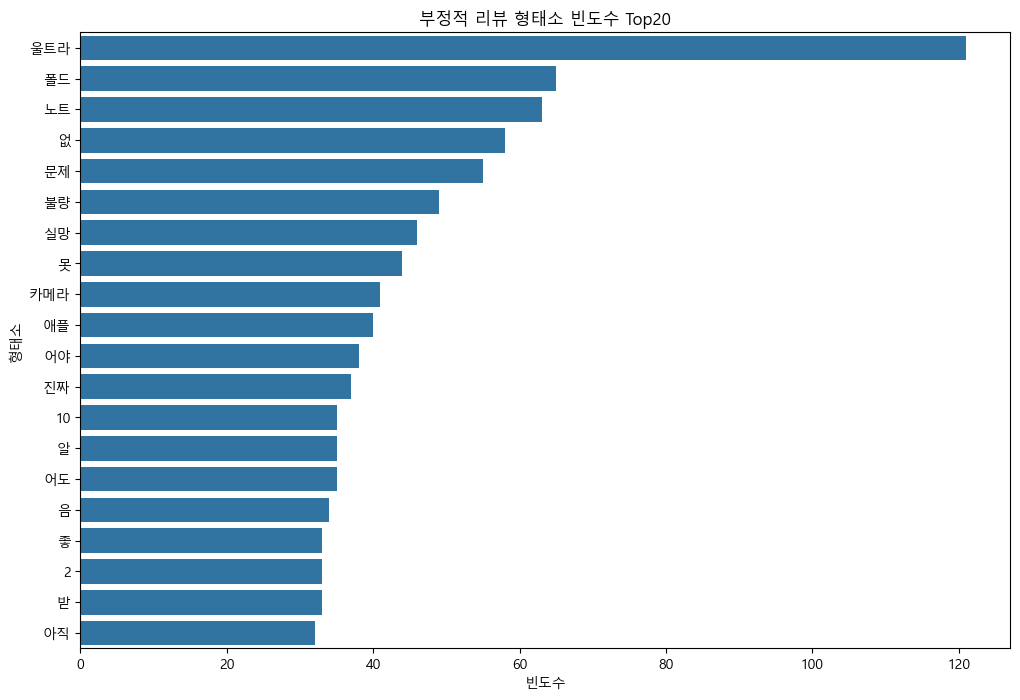

In [ ]:
## 12. 형태소 빈도수 시각화(1) - 각 리뷰별 수평 막대 그래프

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform


# 데이터 불러오기
file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq = pd.read_excel(file_path)

file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq = pd.read_excel(file_path)

## 그래프에 한글 깨짐 현상 해결
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')

mpl.rcParams['axes.unicode_minus'] = False

## 형태소 분석
# 상위 20개의 형태소 빈도수 시각화 함수 정의
def plot_morph_frequencies(mor_freq, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='빈도수', y='형태소', data=mor_freq.head(20))
    plt.title(title)
    plt.xlabel('빈도수')
    plt.ylabel('형태소')
    plt.show()

# Positive 데이터 시각화
plot_morph_frequencies(positive_mor_freq, '긍정적 리뷰 형태소 빈도수 Top20')
plot_morph_frequencies(negative_mor_freq, '부정적 리뷰 형태소 빈도수 Top20')

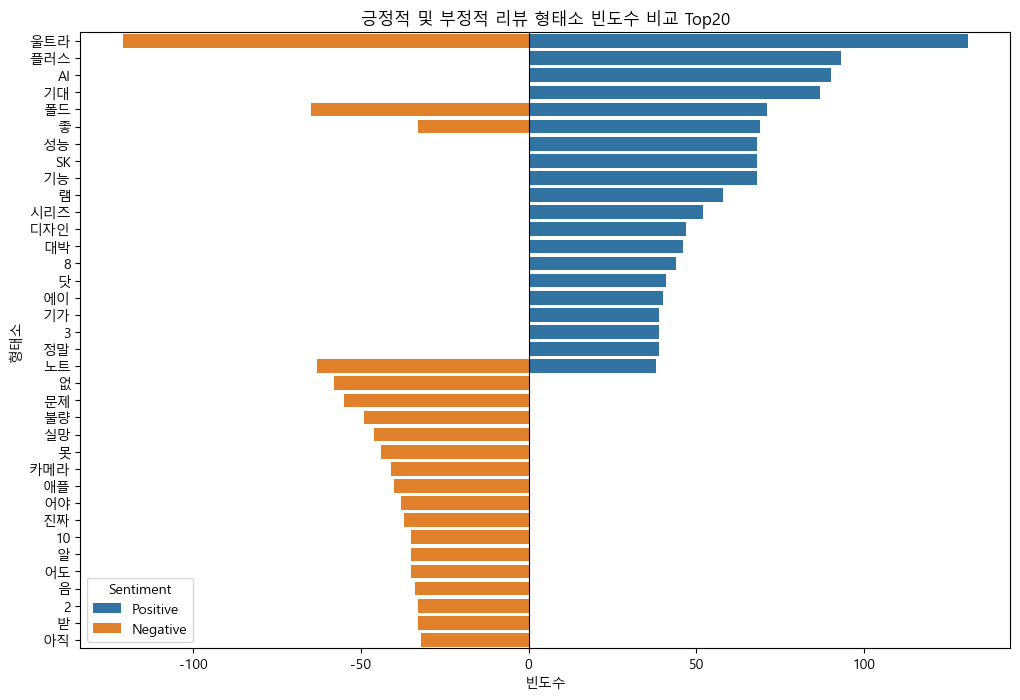

In [ ]:
## 12. 형태소 빈도수 시각화(2) - 수평 막대 그래프 합치기

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform
import pandas as pd


# 데이터 불러오기
file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq = pd.read_excel(file_path)

file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq = pd.read_excel(file_path)

# 그래프에 한글 깨짐 현상 해결
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')

mpl.rcParams['axes.unicode_minus'] = False

# 데이터 예시
# positive_mor_freq = pd.DataFrame({'형태소': ['형태소1', '형태소2'], '빈도수': [10, 20]})
# negative_mor_freq = pd.DataFrame({'형태소': ['형태소1', '형태소2'], '빈도수': [5, 15]})

def plot_morph_frequencies_comparison(pos_freq, neg_freq, title):
    # 부정적 빈도수는 음수로 변환
    neg_freq['빈도수'] = -neg_freq['빈도수']

    # 데이터 병합
    pos_freq['Sentiment'] = 'Positive'
    neg_freq['Sentiment'] = 'Negative'
    combined_freq = pd.concat([pos_freq.head(20), neg_freq.head(20)])

    plt.figure(figsize=(12, 8))

    sns.barplot(x='빈도수', y='형태소', data=combined_freq, hue='Sentiment', dodge=False)

    plt.title(title)
    plt.xlabel('빈도수')
    plt.ylabel('형태소')
    plt.legend(title='Sentiment')
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.show()


# 형태소 빈도수 시각화
plot_morph_frequencies_comparison(positive_mor_freq, negative_mor_freq, '긍정적 및 부정적 리뷰 형태소 빈도수 비교 Top20')

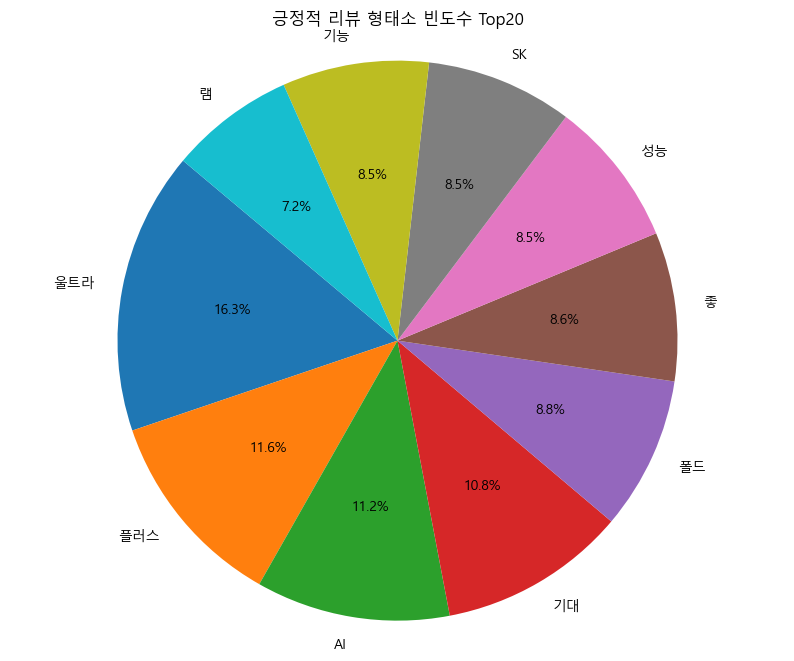

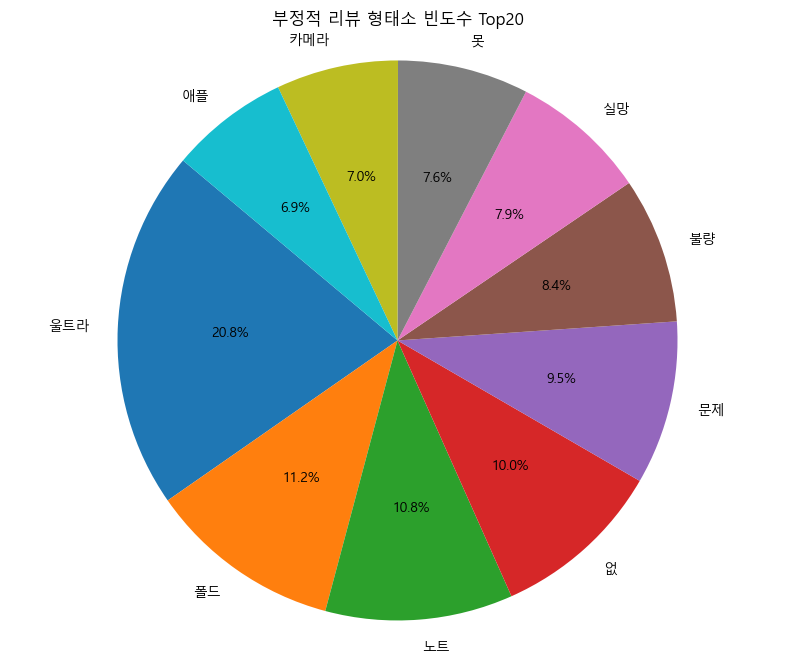

In [ ]:
## 12. 형태소 빈도수 시각화(3) - 파이 차트

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform
import pandas as pd

# 데이터 불러오기
file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq = pd.read_excel(file_path)

file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq = pd.read_excel(file_path)

# 그래프에 한글 깨짐 현상 해결
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')

mpl.rcParams['axes.unicode_minus'] = False

# 파이 차트 함수 정의
def plot_negative_pie_chart(neg_freq, title):
    neg_freq_top20 = neg_freq.head(10)  # 상위 20개 추출
    plt.figure(figsize=(10, 8))
    plt.pie(neg_freq_top20['빈도수'], labels=neg_freq_top20['형태소'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

# 리뷰 형태소 빈도수 시각화
plot_negative_pie_chart(positive_mor_freq, '긍정적 리뷰 형태소 빈도수 Top20')
plot_negative_pie_chart(negative_mor_freq, '부정적 리뷰 형태소 빈도수 Top20')

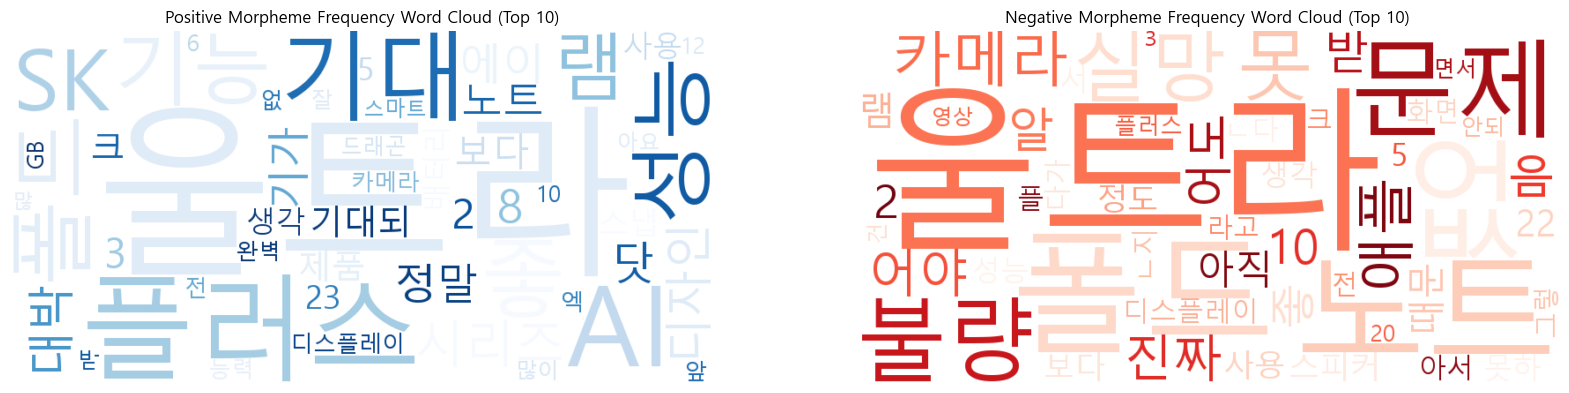

In [ ]:
## 12. 형태소 빈도수 시각화(4) - wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# 데이터 불러오기
file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq = pd.read_excel(file_path)

file_path = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq = pd.read_excel(file_path)


# 상위 10개 형태소만 선택
positive_top10 = positive_mor_freq.nlargest(50, '빈도수')
negative_top10 = negative_mor_freq.nlargest(50, '빈도수')

# 워드클라우드 생성
wordcloud_positive = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(dict(zip(positive_top10['형태소'], positive_top10['빈도수'])))
wordcloud_negative = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(dict(zip(negative_top10['형태소'], negative_top10['빈도수'])))

# 워드클라우드 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Morpheme Frequency Word Cloud (Top 10)')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Morpheme Frequency Word Cloud (Top 10)')

plt.show()

In [ ]:
## 13. 빈도수가 높은 형태소를 포함한 문장 추출

import pandas as pd

# 데이터 불러오기
file_path_pos = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_positive.xlsx'
positive_mor_freq = pd.read_excel(file_path_pos)

file_path_neg = '/content/drive/MyDrive/KDT/kdt 1차 프로젝트/mor_freq_negative.xlsx'
negative_mor_freq = pd.read_excel(file_path_neg)

# 상위 10개 형태소 추출
positive_top10 = positive_mor_freq.nlargest(10, '빈도수')['형태소'].tolist()
negative_top10 = negative_mor_freq.nlargest(10, '빈도수')['형태소'].tolist()


# 불필요한 열 제거
columns_to_drop = ['label', 'score', '댓글_형태소', '댓글_형태소_불용어제거']
s24_positive.drop(columns=columns_to_drop, inplace=True, errors='ignore')
s24_negative.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# 상위 키워드들이 포함된 댓글들을 추출하고 포함된 형태소를 리스트로 추가
def extract_comments_with_keywords(df, keywords):
    df['포함된_형태소'] = df['댓글'].apply(lambda x: [keyword for keyword in keywords if keyword in x])
    comments_with_keywords = df[df['포함된_형태소'].str.len() > 0]
    return comments_with_keywords

# 상위 키워드들이 포함된 댓글들 추출
comments_with_positive_keywords = extract_comments_with_keywords(s24_positive, positive_top10)
comments_with_negative_keywords = extract_comments_with_keywords(s24_negative, negative_top10)

# 결과 확인
print("긍정적 키워드의 빈도수가 높은 형태소를 포함한 문장:")
print(comments_with_positive_keywords[['댓글', '포함된_형태소']])
print('-'*80)

print("부정적 키워드의 빈도수가 높은 형태소를 포함한 문장:")
print(comments_with_negative_keywords[['댓글', '포함된_형태소']])

# 결과를 엑셀 파일로 저장 (파일 이름 변경)
output_file_path_pos = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/comments_with_positive_keywords.xlsx"
comments_with_positive_keywords.to_excel(output_file_path_pos, index=False)

output_file_path_neg = "/content/drive/MyDrive/KDT/kdt 1차 프로젝트/comments_with_negative_keywords.xlsx"
comments_with_negative_keywords.to_excel(output_file_path_neg, index=False)

print("감성 분석 결과가 포함된 Excel 파일이 성공적으로 저장되었습니다:", output_file_path_pos, output_file_path_neg)

긍정적 키워드의 빈도수가 높은 형태소를 포함한 문장:
                                                     댓글     포함된_형태소
5     애플처럼 칩성능이 우월하면 모를까 객관적으로 봤을때 이번에 울트라 사는거 아니면  ...   [울트라, 성능]
6                                             번역기능 대박이네        [기능]
12                                        엣지 디스플레이 좋았는데         [좋]
13    울트라만 쓰다가 디자인이 너무 걸려서 처음으로 플러스로 내려왔는데 플러스디자인으로 ...  [울트라, 플러스]
15    폰이 한두푼하는 것도 아니고 플래그 쉽  울트라는 160부터 시작인데 QC좀 신경 써주지       [울트라]
...                                                 ...         ...
1014                              드디어 s23 울트라 존버 성공 ㅋㅋㅋ       [울트라]
1015            폴드5 사용중인데 1년더쓰고 s25울트라 돈모아서 자급제로 사려구요ㅋㅋ   [울트라, 폴드]
1018  드디어 스냅드래곤이 애플 A시리즈 성능으로 따라잡으면서 갤럭시 떡상하나 했더니 엑시...        [성능]
1022  그에 비해 울트라는 다른 스마트폰과 확실한 차별성으로부터 비롯된 유니크함과 소재의 ...    [울트라, 좋]
1024  예를 들어, 인공지능 비서인 '빅스비'와 SK텔레콤의 '에이닷'가 연동되어 더욱 편...    [SK, 기능]

[549 rows x 2 columns]
--------------------------------------------------------------------------------
부정적 키워드의 빈도수가 높은 형태소를 포함한 문장:
                   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
